# Global Meat Consumption Data Analysis

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
# Read in Data as CSV file
df = pd.read_csv('meat_consumption.csv')

In [3]:
# Check the DataFrame
df.head()

location    indicator subject measure frequency  time      value
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000004
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.808401
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.278166
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.244478
4      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.541244

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   12140 non-null  object 
 1   indicator  12140 non-null  object 
 2   subject    12140 non-null  object 
 3   measure    12140 non-null  object 
 4   frequency  12140 non-null  object 
 5   time       12140 non-null  int64  
 6   value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


In [5]:
df.describe()

time         value
count  12140.000000  1.214000e+04
mean    2009.042175  2.245855e+03
std       11.233660  1.040812e+04
min     1990.000000  7.505681e-08
25%     1999.000000  5.013586e+00
50%     2009.000000  2.427455e+01
75%     2019.000000  4.355984e+02
max     2028.000000  1.402526e+05

In [6]:
df.shape

(12140, 7)

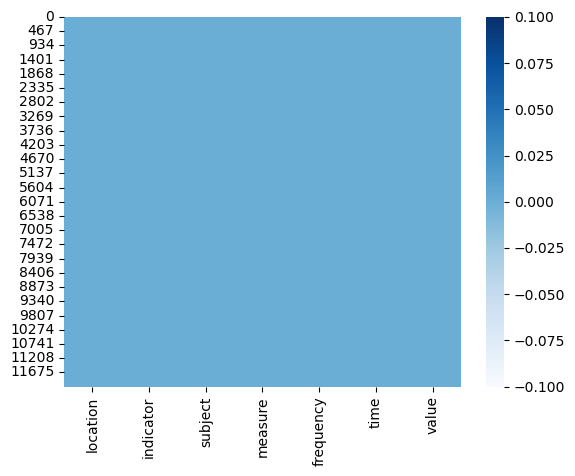

In [7]:
# Check missing values through plot
sns.heatmap(data=df.isna(), cmap='Blues')
plt.show()

In [8]:
# Checking for null values
df.isna().sum()

location     0
indicator    0
subject      0
measure      0
frequency    0
time         0
value        0
dtype: int64

In [9]:
# This dataset includes the following countries as well as aggregates of groups of countries like BRICS, WLD and EU27
df['location'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [10]:
# Data collection started from 1990 and data is projected up to 2028
df['time'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028], dtype=int64)

In [11]:
# Need to convert location to string
df['location'] = df['location'].astype(str)
df['time'] = df['time'].astype(str)

# EDA

In [12]:
# Columns of Data Frame
df.columns

Index(['location', 'indicator', 'subject', 'measure', 'frequency', 'time',
       'value'],
      dtype='object')

<AxesSubplot:xlabel='subject', ylabel='value'>

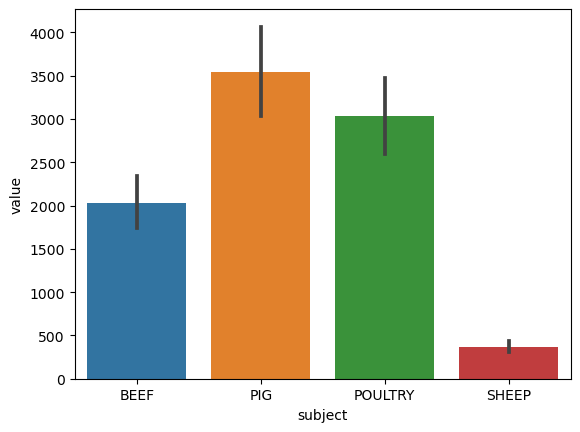

In [13]:
sns.barplot(data=df,x='subject',y='value')

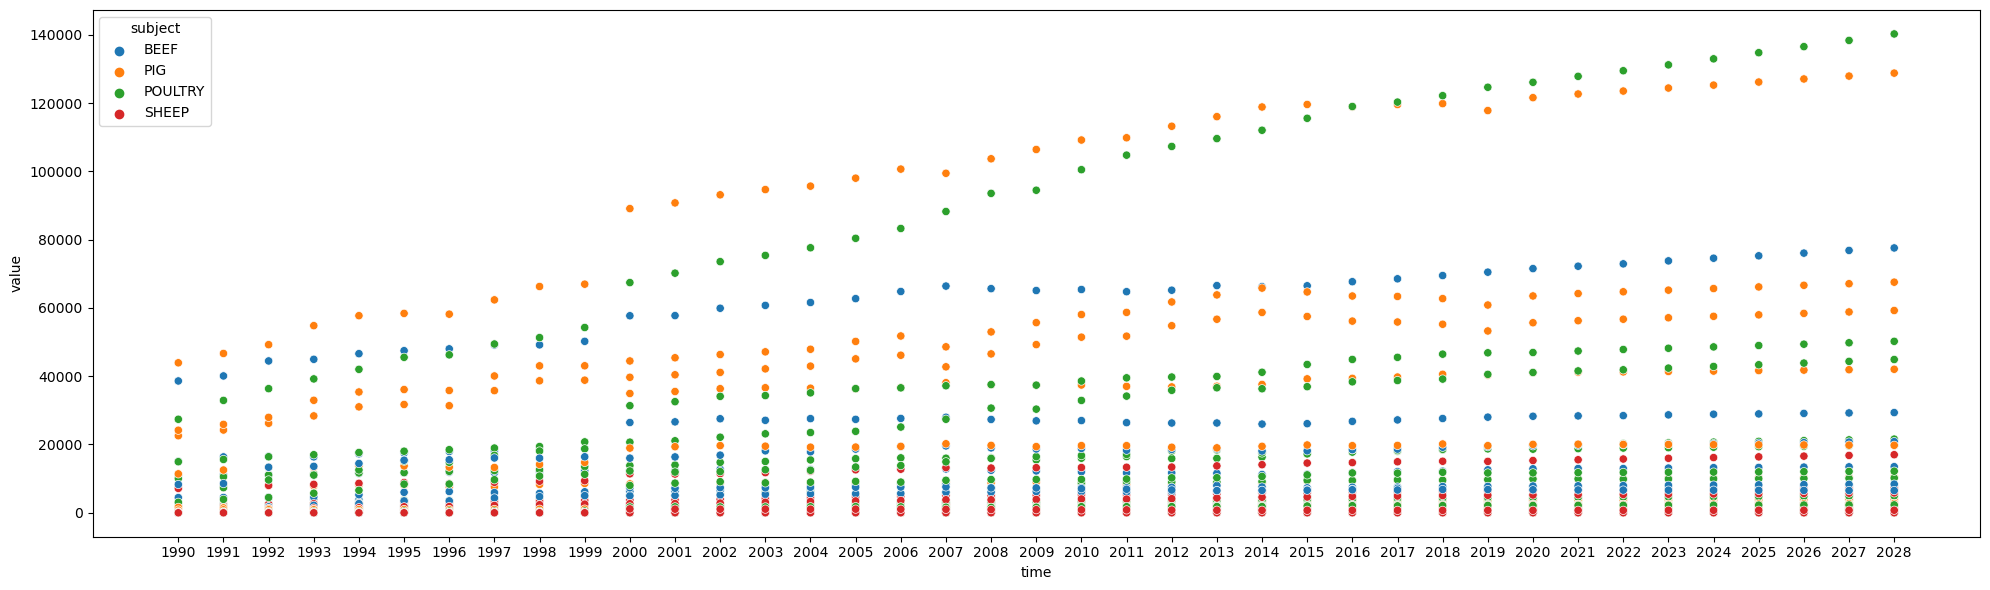

In [14]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df,x='time',y='value',hue='subject')
plt.tight_layout()

It seems that we have 2 measurements for this data set, we shall stick with 1 measurement for more clarity and we shall go with THND_TONNE (thousand tonnes). So, I'm going to create a data frame called df2 to remove the rows that have 'KG_CAP'.

In [15]:
df['measure'].unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [16]:
df2 = df.loc[(df['measure'] != 'KG_CAP')]

df2.head()

location    indicator subject     measure frequency  time      value
5588      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1990   9.563006
5589      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1991   7.896131
5590      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1992  15.466681
5591      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1993  11.515841
5592      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1994  14.188555

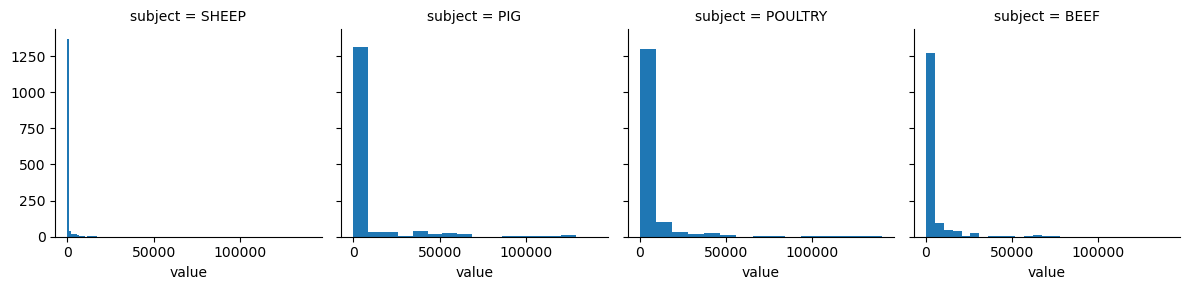

In [17]:
# Checking out the histogram of each type of meat
g = sns.FacetGrid(df2,col='subject')
g = g.map(plt.hist,'value',bins=15)

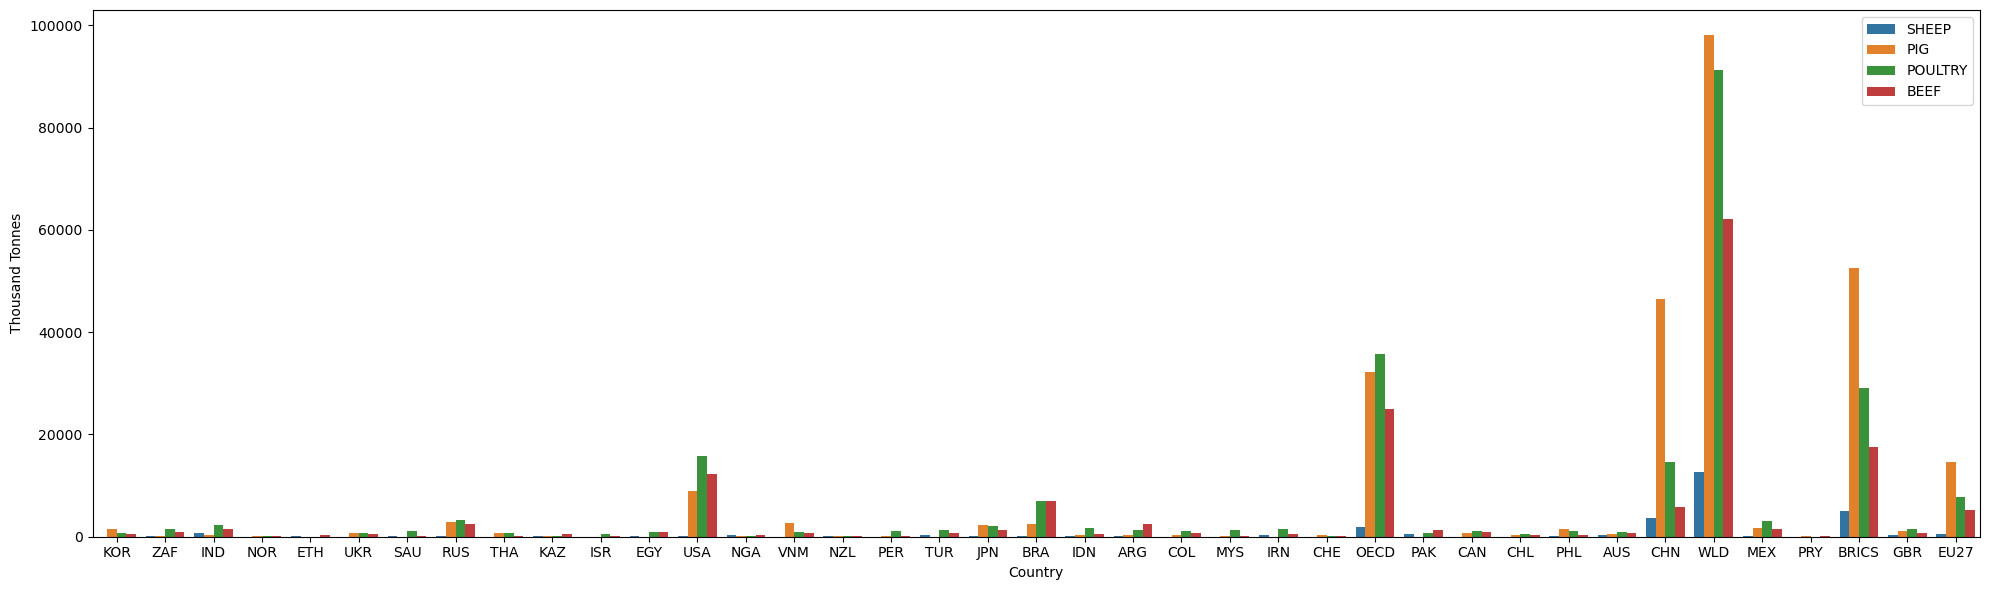

In [18]:
# Checking out each 'location' attribute's meat consumption
plt.figure(figsize=(20,6))
sns.barplot(data=df2,x='location',y='value',hue='subject',ci=None)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.legend(loc=0)
plt.tight_layout()

# Global Consumption of Meat by Year

In [19]:
world_mc = df2.loc[(df['location'] == 'WLD')]

world_mc.head()

location    indicator subject     measure frequency  time         value
9254      WLD  MEATCONSUMP     PIG  THND_TONNE         A  1990  43927.730069
9255      WLD  MEATCONSUMP     PIG  THND_TONNE         A  1991  46664.525694
9256      WLD  MEATCONSUMP     PIG  THND_TONNE         A  1992  49241.715855
9257      WLD  MEATCONSUMP     PIG  THND_TONNE         A  1993  54808.201551
9258      WLD  MEATCONSUMP     PIG  THND_TONNE         A  1994  57731.696565

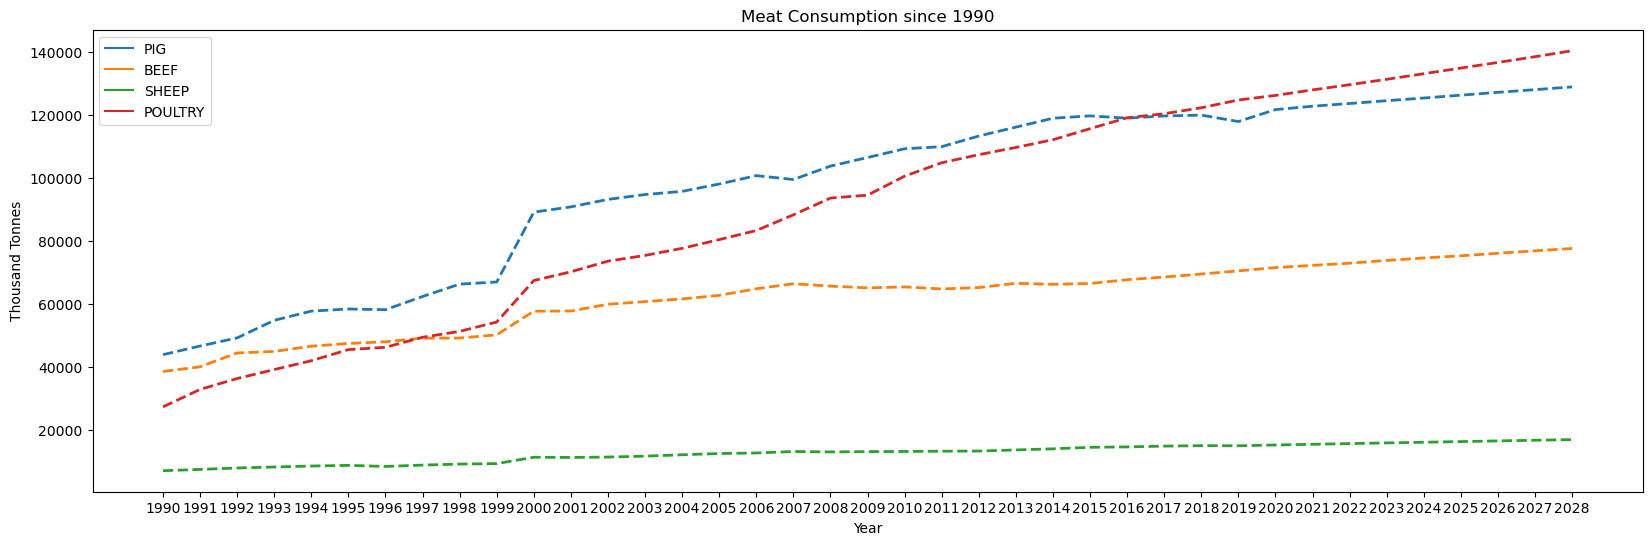

In [20]:
plt.figure(figsize=(20,6))
sns.lineplot(x='time',y='value',data=world_mc,hue='subject',lw=2,ls='--')
plt.xlabel('Year')
plt.ylabel('Thousand Tonnes')
plt.title('Meat Consumption since 1990')
plt.legend(loc=0)

# 2023 Data

In [21]:
mc_2023 = df2.loc[(df['time'] == '2023')]

mc_2023.head()

location    indicator subject     measure frequency  time        value
5621      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  2023    18.749100
5660      ZAF  MEATCONSUMP   SHEEP  THND_TONNE         A  2023   180.244023
5699      KOR  MEATCONSUMP     PIG  THND_TONNE         A  2023  2074.887458
5738      IND  MEATCONSUMP   SHEEP  THND_TONNE         A  2023   750.454308
5777      NOR  MEATCONSUMP     PIG  THND_TONNE         A  2023   142.993998

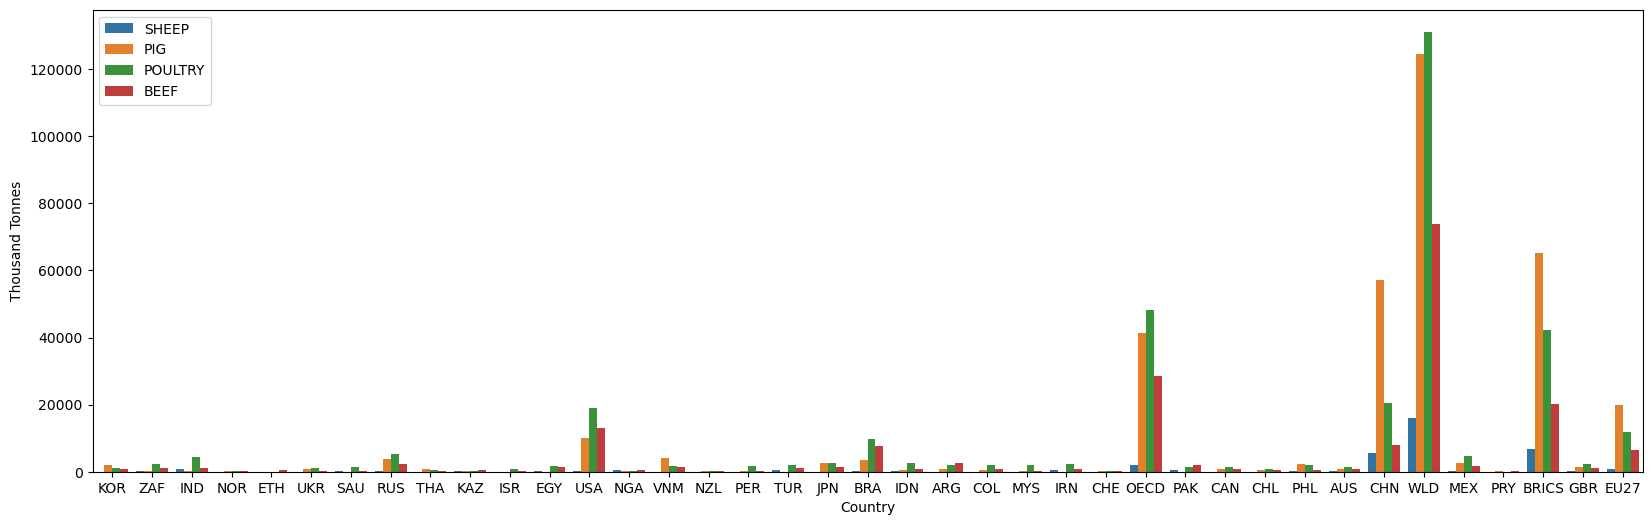

In [47]:
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='value',data=mc_2023,hue='subject',ci=None)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.legend(loc=2)
plt.show()

In [23]:
fig1 = go.Figure(data=[go.Pie(labels=mc_2023['subject'],values=mc_2023['value'],textinfo='label+percent',
                             insidetextorientation='radial',hole=0.3)])
fig1.update_layout(title='Global Meat Consumption 2023')
fig1.show()

# Group Values By Location

BRICS = The BRICS countries are an association of Brazil, Russia, India, China and South Africa. The abbreviation consists of the first letters of the country names.

OECD = The Organization for Economic Co-operation and Development (OECD) is a unique forum where the governments of 37 democracies with market-based economies collaborate to develop policy standards to promote sustainable economic growth.

EU27 = The EU countries are: Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain and Sweden.

Lets skip these as well as they represent group of countries

In [24]:
# Creating a variable that represents the fact table for later use, which excludes World and Group of Countries Data.
country_mc_fact = df2.loc[(df2['location'] != 'WLD') &
                            (df2['location'] != 'BRICS') &
                            (df2['location'] != 'OECD') &
                            (df2['location'] != 'EU27')]

country_mc_fact.head()

location    indicator subject     measure frequency  time      value
5588      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1990   9.563006
5589      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1991   7.896131
5590      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1992  15.466681
5591      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1993  11.515841
5592      KOR  MEATCONSUMP   SHEEP  THND_TONNE         A  1994  14.188555

In [25]:
# Group data by each location
country_mc_2023 = mc_2023.groupby('location').sum()['value'].round(2).reset_index()
country_mc_2023.sort_values(by='value',ascending=False,inplace=True)
country_mc_2023.head()

location      value
37      WLD  345346.44
3     BRICS  134460.01
25     OECD  120350.95
7       CHN   91082.04
35      USA   42474.44

In [26]:
# Exclude World and Group of Countries values
country2_mc_2023 = country_mc_2023[(country_mc_2023['location'] != 'WLD') &
                                  (country_mc_2023['location'] != 'BRICS') &
                                  (country_mc_2023['location'] != 'OECD') &
                                  (country_mc_2023['location'] != 'EU27')]

country2_mc_2023.head()

location     value
7       CHN  91082.04
35      USA  42474.44
2       BRA  21259.63
30      RUS  11520.94
20      MEX   8953.05

In [27]:
# Top 10 Countries with highest meat consumption
top10_mc = country2_mc_2023.head(10)

Text(0.5, 1.0, 'Meat Consumption by Country')

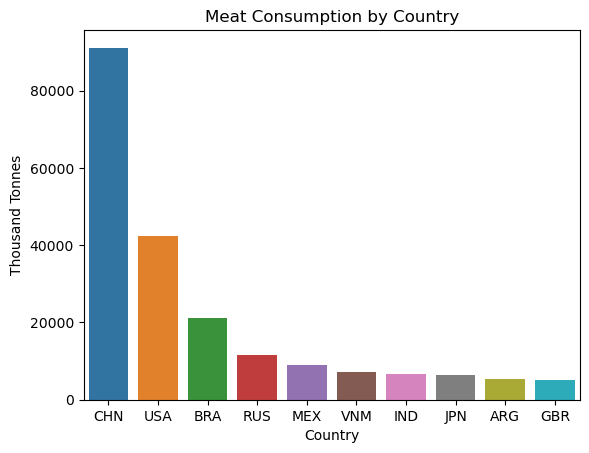

In [28]:
sns.barplot(data=top10_mc,x='location',y='value')
plt.ylabel('Thousand Tonnes')
plt.xlabel('Country')
plt.title('Meat Consumption by Country')

# Group by Meat Type

In [29]:
consumption_by_meat_type = df2.groupby(['subject']).sum()['value'].round(2).reset_index()
consumption_by_meat_type.sort_values(by='value', ascending=False,inplace=True)
consumption_by_meat_type.head()

subject        value
1      PIG  10745024.70
2  POULTRY   9189804.42
0     BEEF   6148495.84
3    SHEEP   1115897.99

In [30]:
# Create the donut chart
fig2 = go.Figure(data=[go.Pie(labels=consumption_by_meat_type['subject'],values=consumption_by_meat_type['value'],textinfo='label+percent',
                             insidetextorientation='radial',hole=0.3)])
fig2.update_layout(title='Global Meat Consumption')
fig2.show()

By global measurements, pork is still makes up the largest global share of meat consumption.

# Meat Consumption by type of meat

In [31]:
df2['subject'].unique()

array(['SHEEP', 'PIG', 'POULTRY', 'BEEF'], dtype=object)

In [32]:
pork_con = country_mc_fact[country_mc_fact['subject']=='PIG']
pork_con_sorted = pork_con.sort_values(by='value',ascending=False)

beef_con =country_mc_fact[country_mc_fact['subject']=='BEEF']
beef_con_sorted = beef_con.sort_values(by='value',ascending=False)

poultry_con = country_mc_fact[country_mc_fact['subject']=='POULTRY']
poultry_con_sorted = poultry_con.sort_values(by='value',ascending=False)

sheep_con = country_mc_fact[country_mc_fact['subject']=='SHEEP']
sheep_con_sorted = sheep_con.sort_values(by='value',ascending=False)

Text(0.5, 1.0, 'Global Pork Consumption')

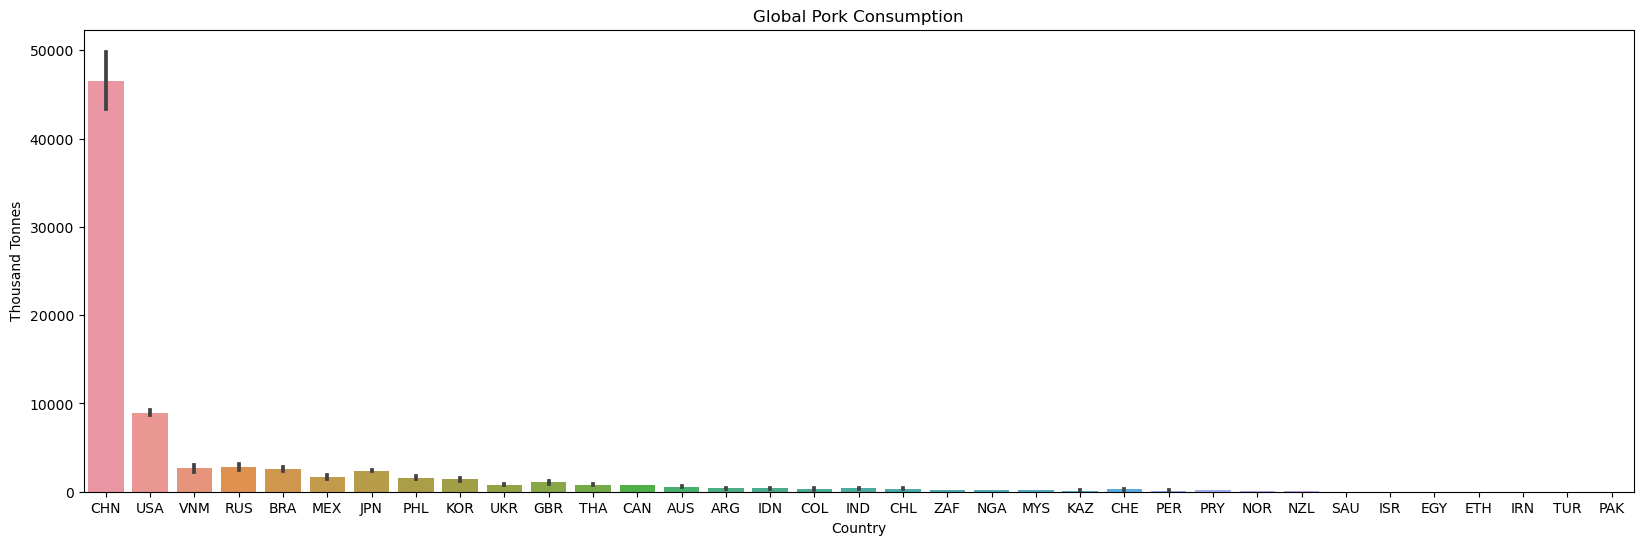

In [33]:
# Global Pork Consumption Chart
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='value',data=pork_con_sorted)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.title('Global Pork Consumption')

Text(0.5, 1.0, 'Global Beef Consumption')

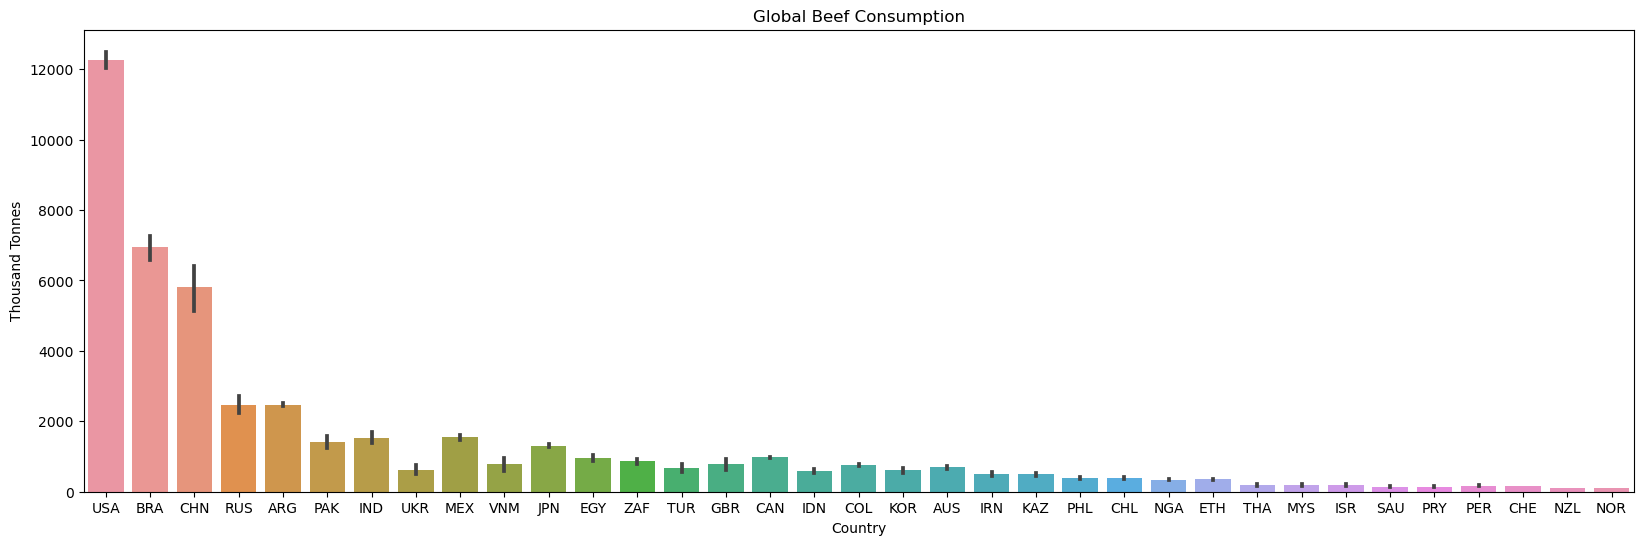

In [34]:
# Global Beef Consumption Chart
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='value',data=beef_con_sorted)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.title('Global Beef Consumption')

Text(0.5, 1.0, 'Global Poultry Consumption')

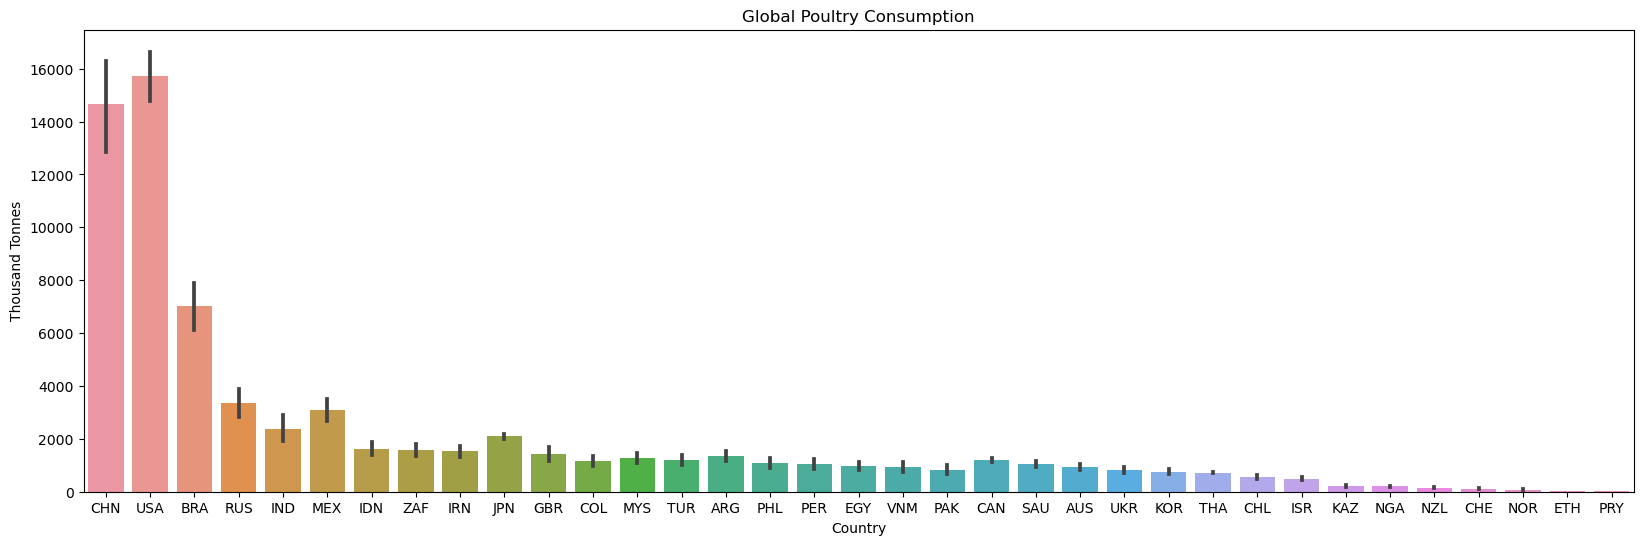

In [35]:
# Global Poultry Consumption Chart
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='value',data=poultry_con_sorted)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.title('Global Poultry Consumption')

Text(0.5, 1.0, 'Global Sheep Consumption')

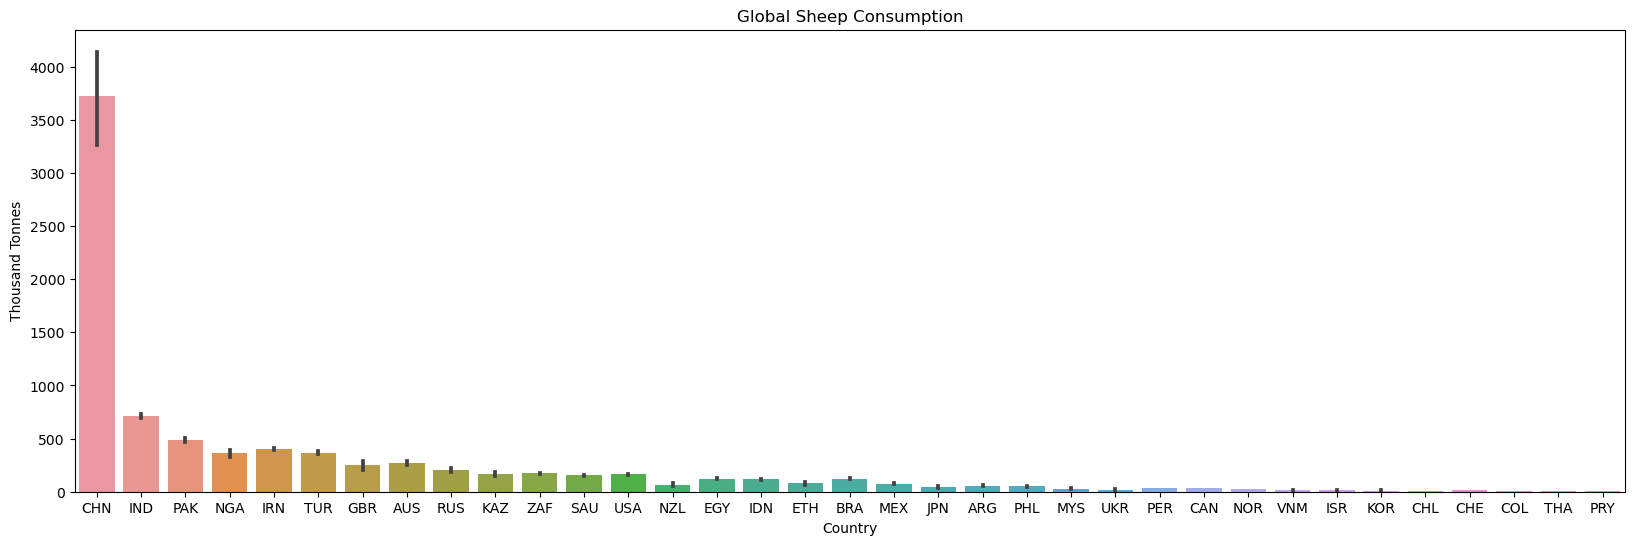

In [36]:
# Global Sheep Consumption Chart
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='value',data=sheep_con_sorted)
plt.xlabel('Country')
plt.ylabel('Thousand Tonnes')
plt.title('Global Sheep Consumption')

In the 4 types of meat consumption data recorded, China has consumed the most in 3 out of the 4 types of meat. Hence, we shall dive a little bit deeper into the data to understand more.

# Meat Consumption in China

First, we need to filter the data with a location conditional formatting.

In [37]:
china_mc = df2[df2['location']=='CHN']
china_mc.head()

location    indicator subject     measure frequency  time         value
9098      CHN  MEATCONSUMP     PIG  THND_TONNE         A  1990  22569.990334
9099      CHN  MEATCONSUMP     PIG  THND_TONNE         A  1991  24242.130959
9100      CHN  MEATCONSUMP     PIG  THND_TONNE         A  1992  26224.894631
9101      CHN  MEATCONSUMP     PIG  THND_TONNE         A  1993  28374.406350
9102      CHN  MEATCONSUMP     PIG  THND_TONNE         A  1994  31025.050881

In [38]:
fig3 = go.Figure(data=[go.Pie(labels=china_mc['subject'],values=china_mc['value'],textinfo='label+percent',
                             insidetextorientation='radial',hole=0.3)])
fig3.update_layout(title='China Meat Consumption')
fig3.show()

As we can see the above donut chart, more than 65% of China's meat consumption comes from pork. 

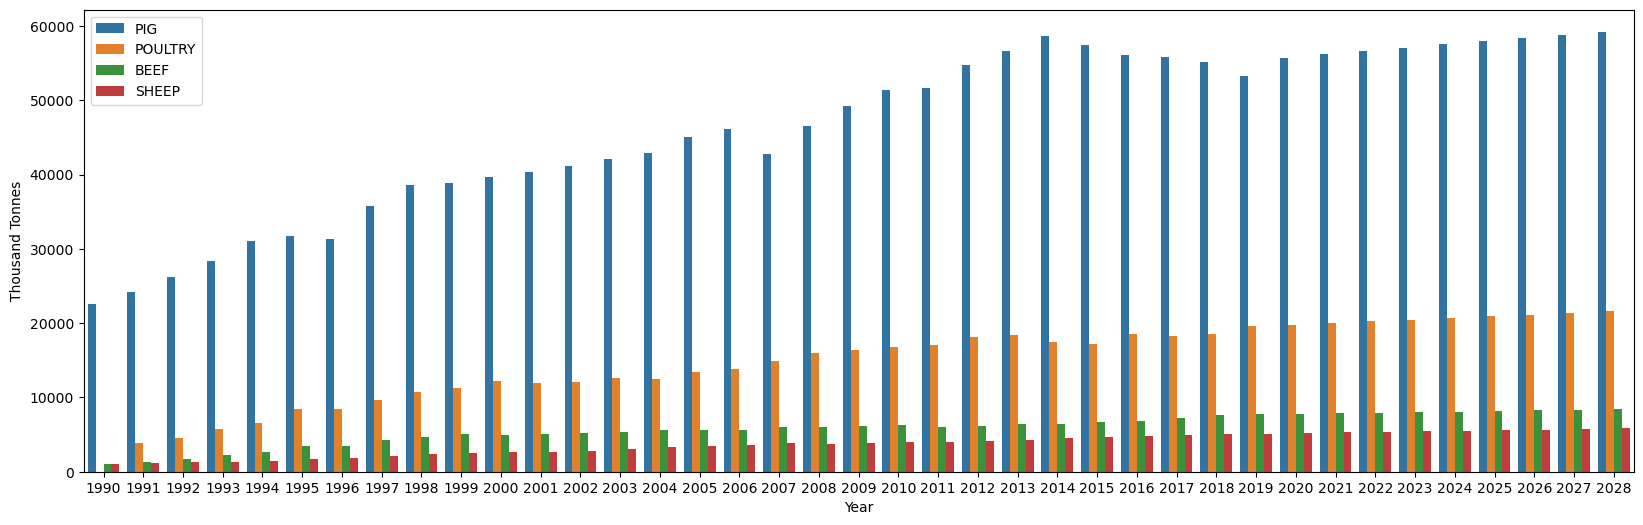

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(x='time',y='value',data=china_mc,hue='subject')
plt.xlabel('Year')
plt.ylabel('Thousand Tonnes')
plt.legend(loc=0)

We can see that throughout the years, pork consumption has always been high in China and it has since increased more than double from 1990 to 2023. Majority of Chinese people prefer pork as the meat of choice for consumption. 

# Meat Consumption in America

In [40]:
us_mc = df2[df2['location']=='USA']
us_mc.head()

location    indicator subject     measure frequency  time         value
6641      USA  MEATCONSUMP    BEEF  THND_TONNE         A  1990  11047.424813
6642      USA  MEATCONSUMP    BEEF  THND_TONNE         A  1991  11076.047790
6643      USA  MEATCONSUMP    BEEF  THND_TONNE         A  1992  11145.846062
6644      USA  MEATCONSUMP    BEEF  THND_TONNE         A  1993  11018.411436
6645      USA  MEATCONSUMP    BEEF  THND_TONNE         A  1994  11527.966824

In [41]:
fig4 = go.Figure(data=[go.Pie(labels=us_mc['subject'],values=us_mc['value'],textinfo='label+percent',
                             insidetextorientation='radial',hole=0.3)])
fig4.update_layout(title='United States Meat Consumption')
fig4.show()

In the United States case, Americans tend to prefer poultry as the meat of choice for consumption.

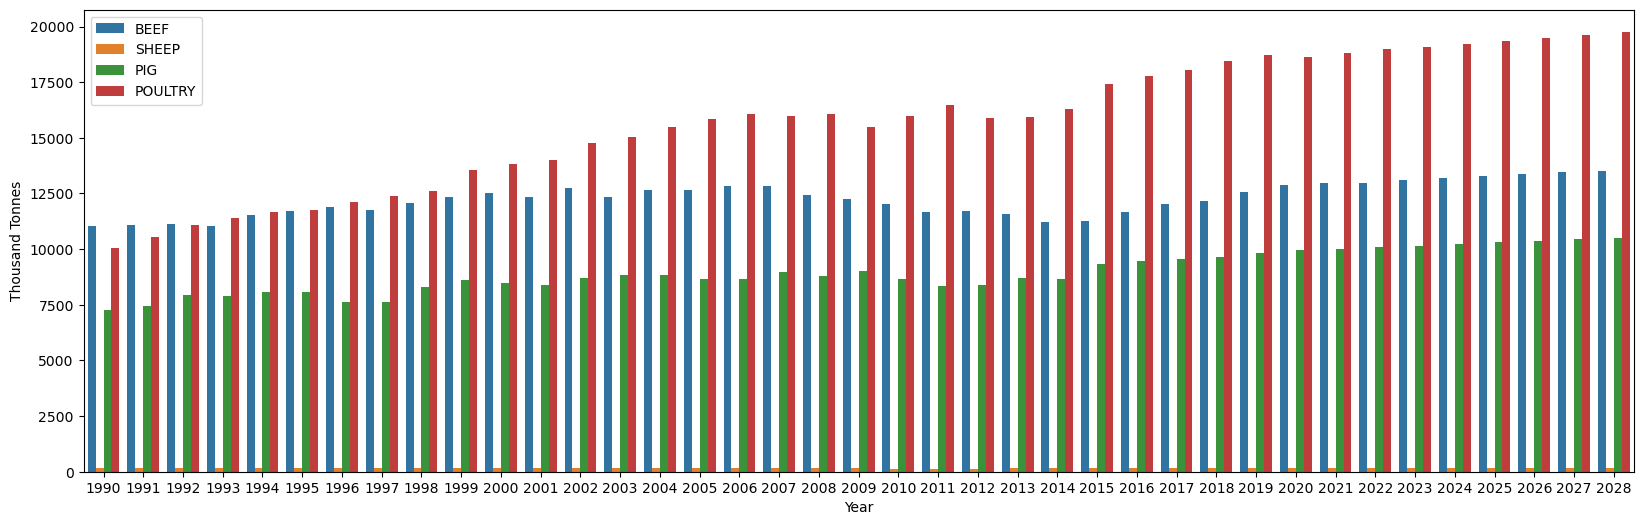

In [42]:
plt.figure(figsize=(20,6))
sns.barplot(x='time',y='value',data=us_mc,hue='subject')
plt.xlabel('Year')
plt.ylabel('Thousand Tonnes')
plt.legend(loc=0)

While beef was the most consumed type of meat in America, poultry consumption overtook it in 1994 and continued to increase further in the 2000s. Poultry consumption is projected to increase past 2023. This can attributed to the cost of producing beef and poultry as raising chickens are more efficient than raising cows as chickens only require 6-8 weeks, while cows take around 18 to 24 months to grow into their slaughter weight.

# Meat Consumption in my home country (Malaysia(MYS))

I thought it would interesting to explore meat consumption in my home country, so here is the breakdown.

In [43]:
my_mc = df2[df2['location']=='MYS']
my_mc.head()

location    indicator subject     measure frequency  time      value
8201      MYS  MEATCONSUMP    BEEF  THND_TONNE         A  1990  66.578103
8202      MYS  MEATCONSUMP    BEEF  THND_TONNE         A  1991  77.073098
8203      MYS  MEATCONSUMP    BEEF  THND_TONNE         A  1992  80.092095
8204      MYS  MEATCONSUMP    BEEF  THND_TONNE         A  1993  83.564095
8205      MYS  MEATCONSUMP    BEEF  THND_TONNE         A  1994  92.372102

In [44]:
fig5 = go.Figure(data=[go.Pie(labels=my_mc['subject'],values=my_mc['value'],textinfo='label+percent',
                             insidetextorientation='radial',hole=0.3)])
fig5.update_layout(title='Malaysia Meat Consumption')
fig5.show()

The conclusion of this data shows that poultry is the preferred meat choice of Malaysians, which makes up 74% of Malaysia's meat consumption.

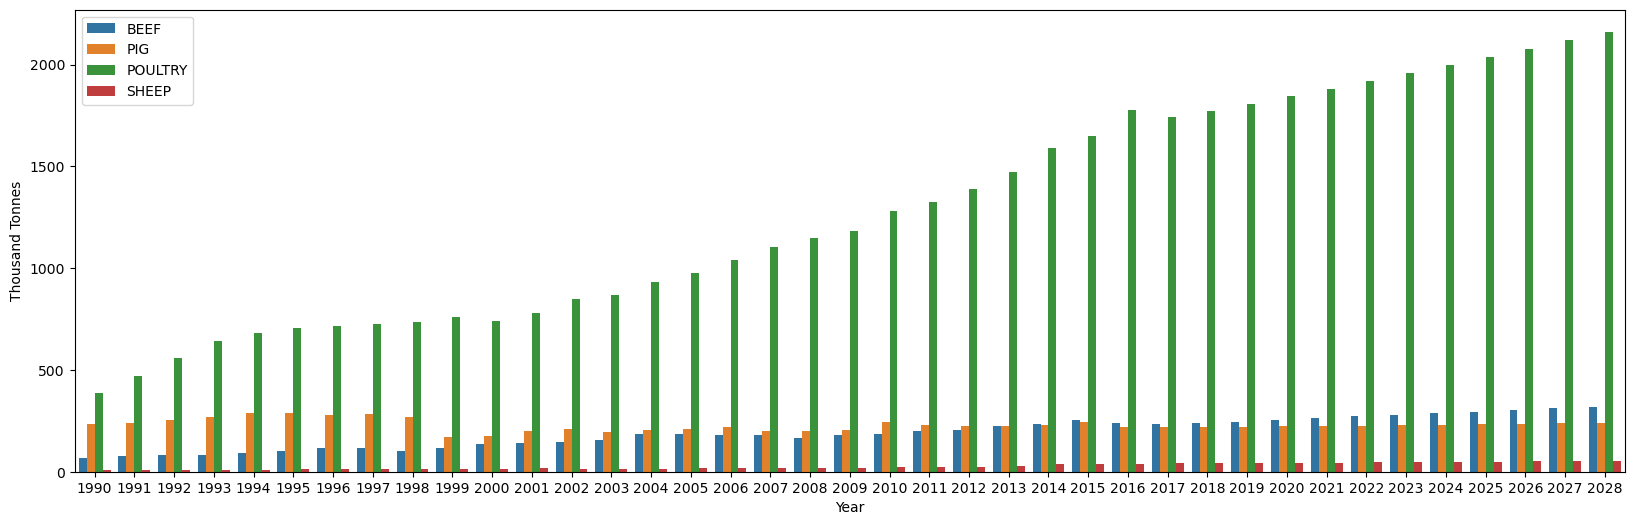

In [45]:
plt.figure(figsize=(20,6))
sns.barplot(x='time',y='value',data=my_mc,hue='subject')
plt.xlabel('Year')
plt.ylabel('Thousand Tonnes')
plt.legend(loc=0)

Since 1990, the consumption of poultry in Malaysia has continued to gradually increase until 2017 where it dipped slightly and continued its trend upwards. Furthermore, due to the reasons explained in the USA analysis above, it is also projected that poultry consumption in Malaysia will continue to increase after 2023.